In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import pickle
import networkx as nx
import matplotlib.pyplot as plt 
import scipy
import math
import operator

In [3]:
dictionary= defaultdict(list)

In [4]:
file = open('wiki-topcats-categories.txt','r')

In [5]:
var=file.readlines()

In [6]:
for item in var:
    value=item.strip().split(';')[1].split()
    
    key=item.strip().split(';')[0]
    key=key.replace('Category:','')
    dictionary[key]=value

In [7]:
inv_dic= defaultdict(list)
for key in dictionary.keys():
    for value in dictionary[key]:
        inv_dic[value].append(key)
        
    

In [8]:
def get_category(cat_list):
    length= len(cat_list)
    #prob= 1/length
    if length > 1:
        index= np.random.randint(length, size=1)[0]
    else:
        index=0
    #print(index)
    new_value= cat_list[index]
    return new_value
    

In [9]:
final_inv_dic=defaultdict(list)
for item in inv_dic.keys():
    try:
        
        category= get_category(inv_dic[item])
    except :
        print(item)
    final_inv_dic[item].append(category)

    

In [10]:
with open("final_inv_dic.pkl", "wb") as f:
    pickle.dump(final_inv_dic,f)

In [2]:
with open("final_inv_dic.pkl", "rb") as f:
        final_inv_dic = pickle.load(f)

# Q 1 create the graph

In [3]:
dataframe=pd.read_csv('wikigraph_reduced.csv', sep="\t", index_col=0)
dataframe.columns= ['Out','In']

In [4]:
len(dataframe)

483094

Spiegare perche

In [5]:
Graphtype = nx.DiGraph()
G = nx.from_pandas_edgelist(dataframe,'Out','In', create_using=Graphtype)

In [5]:
# plt.clf()
# nx.draw(H)
# plt.show()

In [6]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 98343\nNumber of edges: 483094\nAverage in degree:   4.9123\nAverage out degree:   4.9123'

In [6]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 98343\nNumber of edges: 353242\nAverage degree:   7.1839'

In [300]:
i=0
for item in G:
    print(item)
    i+=1
    if i == 10:
        break

95
1185516
108
1059989
1062426
1161925
134
541222
1061485
1163610


In [302]:
G[1185516]

AtlasView({150451: {}, 1062563: {}, 1178930: {}, 1184017: {}, 1184695: {}, 1761109: {}})

### Is the graph directed?

In [6]:
def check_symmetric(a, tol=1e-8):
    return  np.all(np.abs(a-a.T) < tol)

G_matrix=nx.convert_matrix.to_numpy_matrix(G)

KeyboardInterrupt: 

In [20]:
check_symmetric(G_matrix) # Answer 1: The graph is directed

MemoryError: Unable to allocate 72.1 GiB for an array with shape (98343, 98343) and data type float64

In [293]:
n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)

In [294]:
print(m <= n * (n-1)/2) # Answer 1: The graph is directed

True


In [295]:
n # Answer 2: The number of given articles

98343

In [296]:
m # Answer 3: The number of given hyperlinks

483094

In [316]:
Density=(m)/(n*(n-1))

We can say that a graph is dense if the number of edges is close to the maximum number of edges. 
<br>
We define graph density as 
${\displaystyle D={\frac {|E|}{\binom {|V|}{2}}}={\frac {2|E|}{|V|(|V|-1)}}}$



In [317]:
Density # actual density

4.9951571365597335e-05

In [299]:
n*(n-1)  # maximum density 

9671247306

We calculated the density which is equal to 4.9951571365597335e-05. Considering that the maximum possible density of this graph is 9671247306, it is easily observable there is a huge discrepacy between the maximum value and the actual density that we have found. Therefore we conclude that the observed graph is sparse.

Degree distribution

In [303]:
distribution= [len(G[item]) for item in G]
mean= round(sum(distribution)/len(distribution))

In [304]:
#create dictionary
degree_dic= defaultdict(int)
for item in G:
    degree_dic[item]= len(G[item])

In [305]:
mean

5

In [306]:
sum_dist=sum(distribution)
normalized=[(float(i)/sum_dist) for i in distribution]


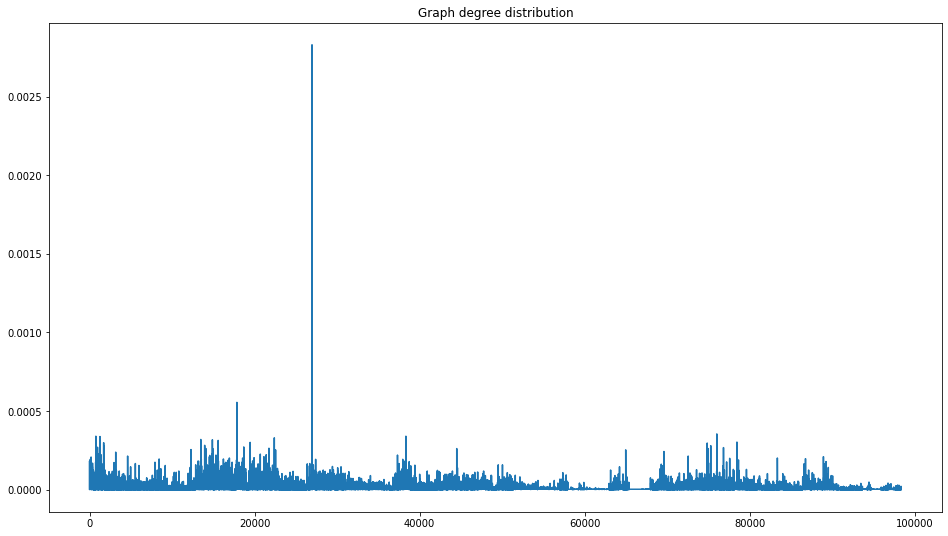

In [307]:

plt.figure(figsize=(16,9))
plt.plot(range(len(distribution)),normalized)
plt.title('Graph degree distribution')
plt.show()

# Q 2

In [5]:
G[1326768]

AtlasView({19447: {}, 499946: {}, 1329156: {}})

In [318]:
def path(node,d,result):  #should work
    arr=[x for x in G[node]]
    #print(arr)
    while(d>0):
        new_arr=[]
        for item in arr:
            result.add(item)
            new_arr.append(item)
            
        d=d-1
        arr=[x  for y in new_arr for x in G[y]]
        #print(arr)
        print(d)
        
   

In [319]:
result = set()
a = path(95, 2, result)


1
0


In [320]:
result

{150451, 1062563, 1178930, 1184017, 1184695, 1185516, 1761109}

In [321]:
G[95]

AtlasView({1185516: {}})

In [322]:
G[1185516]

AtlasView({150451: {}, 1062563: {}, 1178930: {}, 1184017: {}, 1184695: {}, 1761109: {}})

# Q 3

In [323]:
visited = [] # List to keep track of visited nodes.
queue = []     #Initialize a queue

def bfs(visited,queue, graph):
    print(list(final_dic.keys())[:10])
    Category= 'English_football_managers'#input('Insert the category: ')
    print(final_dic[Category])
    p= '76871 74988 83096'#input('Insert pages: ')
    p=p.split()
    p_arr=list(map(int,p))
    
    V= {x: degree_dic[x] for x in p_arr}
    v= max(V.items(), key=operator.itemgetter(1))[0]
    
    
    node=v
    visited.append(node) #nodi visitati 
    queue.append(node)  # nodi di cui devo visitare i vicini
    counter=0
    while p_arr and queue:# finchè ci sono nodi da visitare 
        s = queue.pop(0) # prendi il primo elemento della coda  
        #print (s, end = " ") 
        #print(graph[s])
        
        for neighbour in graph[s]:  # per ogni vicino dell'elemento in questione 
            if neighbour not in visited: # se non è stato ancora visitato
                visited.append(neighbour) #aggiungilo alla lista dei visitati
                queue.append(neighbour) # aggiungilo alla lista dei nodi da attraversare
                if neighbour in p_arr:
                    p_arr.remove(neighbour)
                    print(p_arr)

             
        counter+=1
        if counter% 10000 ==0:
            print(counter)
        
    if len(p_arr)>0:
        print('Not possible')
        
    return counter
# Driver Code
bfs(visited,queue, G)

['English_football_managers', 'Sheffield_United_F.C._players', 'The_Football_League_players', 'Association_football_midfielders', 'Association_football_defenders', 'Northampton_Town_F.C._players', 'Portsmouth_F.C._players', 'UK_MPs_18651868', 'Labour_Party_(UK)_MPs', 'Members_of_the_United_Kingdom_Parliament_for_English_constituencies']
['76871', '74988', '83096', '1006965', '79339', '84802', '77344', '78058', '79277', '370235', '76420', '78365', '79338', '81410', '78014', '77676', '1760834', '75070', '94566', '76558', '83300', '77461', '78002', '79047', '77527', '78708', '79262', '79341', '79674', '79847', '82934', '84458', '77911', '85834', '1693266', '80907', '85260', '81799', '84086', '1489577', '78308', '78309', '79636', '80181', '83496', '80558', '83475', '79892', '80137', '81364', '80675', '81281', '84870', '89825', '78268', '77952', '79213', '83174', '83605', '83702', '85814', '78618', '77204', '77232', '77739', '77817', '78300', '84264', '79626', '1626962', '78390', '81221', '

64010

In [32]:
p= '76871 74988 83096'
p.split()

['76871', '74988', '83096']

1661639 1661634 1661638

In [6]:
len(final_inv_dic)

1791489

In [207]:
list(final_dic.keys())[10:30]

['Liberal_Party_(UK)_MPs',
 'Olympic_medalists_in_cycling',
 'Living_people',
 '2000s_drama_films',
 'American_Jews',
 '1980s_drama_films',
 'American_biologists',
 'Harvard_University_alumni',
 'Massachusetts_Institute_of_Technology_alumni',
 'Harvard_University_faculty',
 'University_of_Michigan_alumni',
 'Cornell_University_faculty',
 'People_from_Boston,_Massachusetts',
 'Yale_University_faculty',
 'Year_of_birth_missing_(living_people)',
 'Alumni_of_the_University_of_Cambridge',
 'Molecular_biologists',
 'American_geneticists',
 'People_from_Norfolk_County,_Massachusetts',
 'Washington_University_in_St._Louis_faculty']

In [25]:
final_dic['English_football_managers']

['76871',
 '74988',
 '83096',
 '1006965',
 '79339',
 '84802',
 '77344',
 '78058',
 '79277',
 '370235',
 '76420',
 '78365',
 '79338',
 '81410',
 '78014',
 '77676',
 '1760834',
 '75070',
 '94566',
 '76558',
 '83300',
 '77461',
 '78002',
 '79047',
 '77527',
 '78708',
 '79262',
 '79341',
 '79674',
 '79847',
 '82934',
 '84458',
 '77911',
 '85834',
 '1693266',
 '80907',
 '85260',
 '81799',
 '84086',
 '1489577',
 '78308',
 '78309',
 '79636',
 '80181',
 '83496',
 '80558',
 '83475',
 '79892',
 '80137',
 '81364',
 '80675',
 '81281',
 '84870',
 '89825',
 '78268',
 '77952',
 '79213',
 '83174',
 '83605',
 '83702',
 '85814',
 '78618',
 '77204',
 '77232',
 '77739',
 '77817',
 '78300',
 '84264',
 '79626',
 '1626962',
 '78390',
 '81221',
 '83164',
 '78540',
 '81028',
 '83891',
 '84421',
 '1006748',
 '77393',
 '80948',
 '84217',
 '85873',
 '87394',
 '90098',
 '730271',
 '77534',
 '80586',
 '77535',
 '1006536',
 '77017',
 '78803',
 '79031',
 '77865',
 '79458',
 '552823',
 '80741',
 '81112',
 '80141',
 '7

In [18]:
{x: cleaned_dic[x] for x in cleaned_dic.keys() if(len(cleaned_dic[x])==5050)}

{}

1. invertire il dizionario 
2. scegliere casualmente un gruppo di pagine
3. trovare quella con più link
4. aggiungere a bfs una lista delle pagine da trovare


In [5]:
a= list(G.nodes)
key_list= final_inv_dic.keys()

In [13]:
cleaned_dic = {}
i = 0

for x in key_list:
    if int(x) in a:
        cleaned_dic[x] = final_inv_dic[x]
    
    i += 1
    
    if (i % 20000) == 0:
        print(i)

In [11]:
with open("cleaned_dic.pkl", "wb") as f:
    pickle.dump(cleaned_dic,f)

In [15]:
with open("cleaned_dic.pkl", "rb") as f:
        cleaned_dic = pickle.load(f)

In [16]:
len(cleaned_dic)

98343

In [17]:
final_dic= defaultdict(list)
for key in cleaned_dic.keys():
    
    for item in cleaned_dic[key]:
        final_dic[item].append(key)

In [18]:
len(final_dic)

5242

# Q 4

In [324]:
def create_subGraph(G):
    Category_1= input().strip()
    Category_2= input().strip()
    nodes_1= list(map(int,final_dic[Category_1]))
    nodes_2= list(map(int,final_dic[Category_2]))
    nodes=nodes_1+ nodes_2
    H= G.subgraph(nodes).copy()
    return nx.DiGraph(H)

In [325]:
H=create_subGraph(G)

Living_people
People_from_Boston,_Massachusetts


In [ ]:
Living_people
People_from_Boston,_Massachusetts

In [244]:
nx.info(H1)

'Name: \nType: Graph\nNumber of nodes: 4760\nNumber of edges: 976\nAverage degree:   0.4101'

In [326]:
nx.info(H)

'Name: \nType: DiGraph\nNumber of nodes: 4760\nNumber of edges: 1166\nAverage in degree:   0.2450\nAverage out degree:   0.2450'

In [213]:
'''plt.clf()
nx.draw(H)
plt.show()'''

'plt.clf()\nnx.draw(H)\nplt.show()'

Ford Fulkerson min-cut algorithm.

In [327]:
visited = [] # List to keep track of visited nodes.
queue = []     #Initialize a queue
def backtrace(parent, start, end):
    path = [end]
    while path[-1] != start:
        path.append(parent[path[-1]])
    path.reverse()
    return path

def bfs_min_cut(visited,queue,graph,u,v):
    #print(H.nodes)
    path=[]
    parents={}
    node=u
    flag=False 
    visited.append(node) #nodi visitati 
    queue.append(node)  # nodi di cui devo visitare i vicini
    counter=0
    while queue:# finchè ci sono nodi da visitare 
        s = queue.pop(0) # prendi il primo elemento della coda  
        #print(s)
        #print(graph[s])
        
        for neighbour in graph[s]: # per ogni vicino dell'elemento in questione 
            #print('ciao')
            if neighbour not in visited: # se non è stato ancora visitato
                parents[neighbour]=s
                visited.append(neighbour) #aggiungilo alla lista dei visitati
                queue.append(neighbour) # aggiungilo alla lista dei nodi da attraversare
                if neighbour==v:
                    path= backtrace(parents,u,v)
                    flag=True 
                    print('Found')
                    break
                   

             
        counter+=1
        if counter% 10000 ==0:
            print(counter)
        
    
        
    return counter, path, flag 
# Driver Code


In [328]:
def min_cut(visited,queue,graph,u,v):
    H1=graph.copy()
    min_edges=0
    counter, path, flag = bfs_min_cut(visited,queue,H1,u,v)
    print(path)
    
    while flag:
        
        
        min_edges+=1
        i=0
        while i < len(path)-1:
            
            try:
                
                H1.remove_edge(path[i],path[i+1])
            except:
                
                H1.remove_edge(path[i+1],path[i])
                
            counter, path, flag = bfs_min_cut(visited,queue,H1,u,v)
                
    return min_edges


In [339]:
s,path=bfs_min_cut(visited,queue,H,1065187,946685)

Found


ValueError: too many values to unpack (expected 2)

In [340]:
visited = [] # List to keep track of visited nodes.
queue = []     #Initialize a queue
min_cut(visited,queue,H,1065187,946685)

Found
[1065187, 691278, 946685]


1

In [336]:
{x:list(H[x]) for x in H if len(H[x])==3 }

{1065187: [691278, 1058635, 1078473],
 386079: [385755, 386678, 387102],
 386683: [386677, 386678, 386862],
 1058565: [1058323, 1059792, 1061164],
 1165132: [1060295, 1164133, 1165148],
 1165148: [1061917, 1062625, 1163453],
 436181: [88193, 88602, 88604],
 387776: [385773, 385791, 386498],
 691278: [946685, 1061960, 1062625],
 143594: [143595, 143609, 1163230],
 1061164: [1059197, 1060921, 1062873],
 725357: [725305, 1129823, 1130385],
 1053608: [1053605, 1053612, 1060411],
 1061829: [1060921, 1062059, 1062131],
 1061846: [1061743, 1061938, 1258813],
 1061917: [1061081, 1061764, 1063165],
 1062087: [1061764, 1062489, 1163858],
 1504667: [1073354, 1163600, 1166622],
 136606: [1059471, 1060534, 1170183],
 88193: [88602, 88604, 436181],
 1063219: [1059386, 1061396, 1163931],
 88604: [88193, 88602, 436181],
 88602: [88193, 88604, 436181],
 81013: [78527, 81416, 83216],
 1162747: [400397, 479885, 1059386],
 1064784: [1057994, 1063334, 1065282]}

In [337]:
H[691278]

AtlasView({946685: {}, 1061960: {}, 1062625: {}})

In [338]:
H[946685]

AtlasView({})

# Q 5

Sappiamo che la bfs ritorna sempre il minimo percorso tra due nodi

In [6]:
map_integer= defaultdict(int)
i=0
for item in G:
    map_integer[item]=i
    i+=1

In [15]:
map_integer

defaultdict(int,
            {95: 0,
             1185516: 1,
             108: 2,
             1059989: 3,
             1062426: 4,
             1161925: 5,
             134: 6,
             541222: 7,
             1061485: 8,
             1163610: 9,
             1163783: 10,
             153: 11,
             744272: 12,
             1064807: 13,
             1065282: 14,
             1085943: 15,
             1125916: 16,
             1130618: 17,
             1161083: 18,
             1162104: 19,
             1162238: 20,
             167: 21,
             645690: 22,
             804311: 23,
             173: 24,
             174: 25,
             146870: 26,
             1059766: 27,
             1059906: 28,
             1060905: 29,
             1061638: 30,
             1067692: 31,
             1130481: 32,
             1163227: 33,
             1166373: 34,
             1223897: 35,
             1061112: 36,
             1061313: 37,
             1063717: 38,
             

In [20]:
#distance_matrix=np.zeros((len(G.nodes),len(G.nodes))) 
def bfs_category(visited,queue,distance_matrix, graph,start):
    
    node=start
    visited.append(node) #nodi visitati 
    queue.append(node)  # nodi di cui devo visitare i vicini
    counter=0
    while queue:# finchè ci sono nodi da visitare 
        s = queue.pop(0) # prendi il primo elemento della coda  
        #print (s, end = " ") 
        #print(graph[s])
        i= map_integer[s]
        for neighbour in graph[s]:  # per ogni vicino dell'elemento in questione 
            if neighbour not in visited: # se non è stato ancora visitato
                visited.append(neighbour) #aggiungilo alla lista dei visitati
                queue.append(neighbour) # aggiungilo alla lista dei nodi da attraversare
                j=map_integer[neighbour]
                distance_matrix[i][j]=counter
             
        counter+=1
        if counter% 10000 ==0:
            print(counter)
        
    
        
    return 

In [21]:
distance_matrix=np.full((len(G.nodes),len(G.nodes)),100000) 

In [22]:
def initialize(distance_matrix):
    for n1,n2 in G.edges:
        i=map_integer[n1]
        j=map_integer[n2]
        distance_matrix[i][j]=1

In [23]:
initialize(distance_matrix)

In [24]:
def FloydWarshall(graph,distance_matrix,map_integer,node_list): 
    d = len(node_list)
    for node in node_list:
        k=map_integer[node]
        # pick all vertices as source one by one 
        d-=1
        print(d)
            
        for node_2 in graph.nodes:
            i=map_integer[node_2]
            # Pick all vertices as destination for the 
            # above picked source 
            for node_3 in graph.nodes:
                j=map_integer[node_3]
  
                # If vertex k is on the shortest path from  
                # i to j, then update the value of dist[i][j] 
                distance_matrix[i][j] = min(distance_matrix[i][j] , 
                                  distance_matrix[i][k]+ distance_matrix[k][j] 
                                ) 
   

In [25]:
def get_distance(graph,distance_matrix,map_integer):
    medians_dic={}
    category=input()
    all_categories=list(final_dic.keys())
    all_categories.remove(category)
    nodes=[int(x) for x in final_dic[category]]
    
    FloydWarshall(graph,distance_matrix,map_integer,nodes)
    
    for item in all_categories:
        distance=[]
        current_nodes=[int(x) for x in final_dic[item]]
        for i in current_nodes:
            for j in nodes:
                a=map_integer[j]
                b=map_integer[i]
                distance.append(distance_matrix[a][b])
                
        medians_dic[item]=np.median(distance)
        
    result=sorted(medians_dic.items(), key=operator.itemgetter(1))
#     result=list(sorted_dic.keys())
    
    return result
                

In [26]:
a = get_distance(G,distance_matrix,map_integer)

People_from_Norfolk_County,_Massachusetts
2
1
0


In [27]:
with open("get_distance.pkl", "wb") as f:
    pickle.dump(a,f)

In [28]:
with open("get_distance.pkl", "rb") as f:
    a = pickle.load(f)

In [29]:
a

[('English_football_managers', 100000.0),
 ('Sheffield_United_F.C._players', 100000.0),
 ('The_Football_League_players', 100000.0),
 ('Association_football_midfielders', 100000.0),
 ('Association_football_defenders', 100000.0),
 ('Northampton_Town_F.C._players', 100000.0),
 ('Portsmouth_F.C._players', 100000.0),
 ('UK_MPs_18651868', 100000.0),
 ('Labour_Party_(UK)_MPs', 100000.0),
 ('Members_of_the_United_Kingdom_Parliament_for_English_constituencies',
  100000.0),
 ('Liberal_Party_(UK)_MPs', 100000.0),
 ('Olympic_medalists_in_cycling', 100000.0),
 ('Living_people', 100000.0),
 ('2000s_drama_films', 100000.0),
 ('American_Jews', 100000.0),
 ('1980s_drama_films', 100000.0),
 ('American_biologists', 100000.0),
 ('Harvard_University_alumni', 100000.0),
 ('Massachusetts_Institute_of_Technology_alumni', 100000.0),
 ('Harvard_University_faculty', 100000.0),
 ('University_of_Michigan_alumni', 100000.0),
 ('Cornell_University_faculty', 100000.0),
 ('People_from_Boston,_Massachusetts', 100000.0

In [283]:
distance_matrix=np.zeros((len(G.nodes),len(G.nodes))) 
category=input('Insert category')
for node in final_dic[category]:
    visited = [] # List to keep track of visited nodes.
    queue = []     #Initialize a queue
    bfs_category(visited,queue,distance_matrix, G,int(node))

Insert categoryPeople_from_Norfolk_County,_Massachusetts
10000
20000
30000
40000
50000
60000
70000
80000
90000
10000
20000
30000
40000
50000
60000
70000
80000
90000
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [288]:
distance_matrix[1]

array([41775.,     0.,     0., ...,     0.,     0.,     0.])

In [280]:
{x: final_dic[x] for x in final_dic.keys() if(len(final_dic[x])==3)}

{'People_from_Norfolk_County,_Massachusetts': ['836702', '245040', '1409723'],
 'People_from_Winston-Salem,_North_Carolina': ['135549', '1039467', '1151492'],
 'American_writers_of_Irish_descent': ['1163571', '824592', '1265367'],
 'Ojibwe_people': ['1165593', '288878', '288930'],
 'Kennedy_Center_honorees': ['1061482', '1061452', '1061487'],
 'United_States_Army_Air_Forces_officers': ['389924', '1165103', '1416513'],
 'American_military_personnel_of_the_Vietnam_War': ['143615',
  '324470',
  '1074184'],
 'People_from_Burlington,_Vermont': ['823271', '556634', '939085'],
 'Recipients_of_the_Silver_Star': ['923484', '1162126', '1165701'],
 'Hollywood_blacklist': ['1163765', '901592', '1046672'],
 'American_inventors': ['928293', '253324', '423429'],
 'American_science_writers': ['330148', '364844', '1233875'],
 'FK_Borac_aak_players': ['736070', '737060', '736285'],
 'Boavista_F.C._players': ['737956', '84387', '737565'],
 'FC_Braov_players': ['27293', '27348', '27560'],
 'FC_Zrich_play